# Model testing

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import datetime as dt
import pickle
import itertools

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
data = pd.read_csv("final_dataset_V2.csv")

In [30]:
data.head()

,CustomerID,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
0,12347.0,13.2,45.0,23.308571,2.0,367.0,7,4310.00,2458,16,...,0.0,0.026729,0.0,0.000000,0.0,0.042877,0.000000,0.007494,0.046775,0.0
1,12348.0,39.6,150.0,82.840000,75.0,358.0,4,1437.24,2332,12,...,0.0,0.000000,0.0,0.000000,0.0,0.204559,0.159806,0.000000,0.000000,0.0
2,12349.0,15.0,15.0,15.000000,18.0,18.0,1,1457.55,630,18,...,0.0,0.004556,0.0,0.044458,0.0,0.004556,0.000000,0.000000,0.000000,0.0
3,12350.0,25.2,25.2,25.200000,310.0,310.0,1,294.40,196,24,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.050951,0.000000,0.0
4,12352.0,9.9,35.7,19.650000,36.0,296.0,6,1265.41,463,24,...,0.0,0.000000,0.0,0.028923,0.0,0.039355,0.000000,0.000000,0.000000,0.0


In [20]:
data.columns[:20]

Index(['CustomerID', 'min', 'max', 'mean', 'min_recency', 'max_recency',
       'frequency', 'monetary_value', 'quantity', 'country', 'cluster',
       'Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4',
       'Cluster_5', 'Cluster_6', 'Cluster_7', 'Cluster_8'],
      dtype='object')

# Features preparation

In [31]:
cluster0 = data[data['cluster']==0]
cluster1 = data[data['cluster']==1]
cluster2 = data[data['cluster']==2]
cluster3 = data[data['cluster']==3]
cluster4 = data[data['cluster']==4]
cluster5 = data[data['cluster']==5]
cluster6 = data[data['cluster']==6]
cluster7 = data[data['cluster']==7]

In [32]:
print(cluster0.shape[0], cluster1.shape[0], cluster2.shape[0], cluster3.shape[0], 
      cluster4.shape[0], cluster5.shape[0], cluster6.shape[0], cluster7.shape[0])a

944 1544 3 296 4 1453 62 19


In [34]:
frames = [cluster0.sample(frac=0.8, random_state=0), cluster1.sample(frac=0.9, random_state=0),
          cluster2.sample(frac=0.7, random_state=0),cluster3.sample(frac=0.6, random_state=0),
          cluster4.sample(frac=0.5, random_state=0), cluster5.sample(frac=0.9, random_state=0),
          cluster6.sample(frac=0.6, random_state=0), cluster7.sample(frac=0.5, random_state=0)]


data_train_biased = pd.concat(frames)
data_test_biased = data.drop(data_train_biased.index, axis = 0)

In [36]:
X_random = data.drop(columns=['CustomerID', 'cluster']) 
y_random = data['cluster'].values

X_train_biased = data_train_biased.drop(columns=['CustomerID', 'cluster'])
X_test_biased = data_test_biased.drop(columns=['CustomerID', 'cluster'])
y_train_biased = data_train_biased['cluster'].values
y_test_biased = data_test_biased['cluster'].values


In [32]:
data.columns[0:20]

Index(['CustomerID', 'min', 'max', 'mean', 'min_recency', 'max_recency',
       'nb_visit', 'frequency', 'monetary_value', 'quantity', 'cluster',
       'Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4',
       'Cluster_5', 'Cluster_6', 'Cluster_7', 'Cluster_8'],
      dtype='object')

In [41]:
scaler = StandardScaler() # create scaler object

X_random_scaled = scaler.fit_transform(X_random)
X_train_biased = scaler.fit_transform(X_train_biased)
X_test_biased = scaler.fit_transform(X_test_biased)

In [43]:
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X_random,y_random,test_size = 0.2,random_state = 0) # Do 80/20 split

# Testing different models

## Baseline

In [40]:
from sklearn.dummy import DummyClassifier

In [44]:
dummy_random = DummyClassifier(random_state=0)
dummy_biased = DummyClassifier(random_state=0)
dummy_random.fit(X_train_random, y_train_random)
dummy_biased.fit(X_train_biased, y_train_biased)

DummyClassifier(constant=None, random_state=0, strategy='stratified')

In [45]:
print("Baseline accuracy for random sampling:", (dummy_random.score(X_test_random, y_test_random))*100)
print("Baseline accuracy for biased sampling:", (dummy_biased.score(X_test_biased, y_test_biased))*100)

Baseline accuracy for random sampling: 30.520231213872833
Baseline accuracy for biased sampling: 25.194401244167963


## Linear models

In [46]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

### Logistic Regression

In [47]:
LogisticRegression_random = LogisticRegression()
LogisticRegression_biased = LogisticRegression()
LogisticRegression_random.fit(X_train_random, y_train_random)
LogisticRegression_biased.fit(X_train_biased, y_train_biased)
print("LogisticRegression_classifier with random sampling accuracy:", (LogisticRegression_random.score(X_test_random, y_test_random))*100)
print("LogisticRegression_classifier with biased sampling accuracy:", (LogisticRegression_biased.score(X_test_biased, y_test_biased))*100)

LogisticRegression_classifier with random sampling accuracy: 95.26011560693641
LogisticRegression_classifier with biased sampling accuracy: 75.58320373250389


### SGD Classifier

In [51]:
SGD_random = SGDClassifier()
SGD_biased = SGDClassifier()
SGD_random.fit(X_train_random, y_train_random)
SGD_biased.fit(X_train_biased, y_train_biased)
print("SGDClassifier with random sampling accuracy:", (SGD_random.score(X_test_random, y_test_random))*100)
print("SGDClassifier with biased sampling accuracy:", (SGD_biased.score(X_test_biased, y_test_biased))*100)

SGDClassifier with random sampling accuracy: 62.774566473988436
SGDClassifier with biased sampling accuracy: 68.11819595645412


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


## SVM Classifiers

In [57]:
from sklearn.svm import LinearSVC

### Linear SVC

In [59]:
LinearSV_random = LinearSVC()
LinearSV_biased = LinearSVC()
LinearSV_random.fit(X_train_random, y_train_random)
LinearSV_biased.fit(X_train_biased, y_train_biased)
print("LinearSV with random sampling accuracy:", (LinearSV_random.score(X_test_random, y_test_random))*100)
print("LinearSV with biased sampling accuracy:", (LinearSV_biased.score(X_test_biased, y_test_biased))*100)

LinearSV with random sampling accuracy: 68.32369942196533
LinearSV with biased sampling accuracy: 75.73872472783826


# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc_random=RandomForestClassifier(random_state=0, n_estimators = 1000)
rfc_biased=RandomForestClassifier(random_state=0, n_estimators = 1000)

In [62]:
param_grid = { 
    'n_estimators' : [100, 500, 1000],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 6],
    'criterion' :['gini', 'entropy']
}

In [63]:
CV_rfc_random = model_selection.GridSearchCV(estimator=rfc_random, param_grid=param_grid, cv= 5, verbose=10, n_jobs=-1, scoring='accuracy')
CV_rfc_random.fit(X_train_random, y_train_random)

CV_rfc_biased = model_selection.GridSearchCV(estimator=rfc_biased, param_grid=param_grid, cv= 5, verbose=10, n_jobs=-1, scoring='accuracy')
CV_rfc_biased.fit(X_train_biased, y_train_biased)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.8706896551724138, total=   1.3s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.8672438672438673, total=   1.3s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.8625180897250362, total=   1.4s
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.8728323699421965, total=   1.4s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=500 
[CV] criterion=gini, max_depth=4, max_features=auto, n_

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.7s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.867816091954023, total=   4.8s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.8845598845598845, total=   4.7s
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.869942196531792, total=   4.7s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=1000 
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.8596237337192475, total=   5.4s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.8648255813953488, total=   6.0s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=1000 


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.8s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=1000, score=0.867816091954023, total=  10.8s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=1000, score=0.8787878787878788, total=  10.9s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=1000, score=0.8641618497109826, total=  10.6s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100, score=0.8706896551724138, total=   0.9s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100, score=0.8672438672438673, total=   1.0s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100, score=0.87

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   22.3s


[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100, score=0.8473837209302325, total=   1.0s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=1000, score=0.85383502170767, total=   9.8s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500, score=0.867816091954023, total=   5.1s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500, score=0.8845598845598845, total=   5.0s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500, score=0.869942196531792, total=   5.6s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=1000, score=0.866279

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   33.9s


[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000, score=0.867816091954023, total=   9.9s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000, score=0.8787878787878788, total=   9.8s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.8146551724137931, total=   0.7s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.823953823953824, total=   0.8s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.8063583815028902, total=   0.8s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000, score=0.864

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   45.0s


[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.7892441860465116, total=   1.0s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=500, score=0.8189655172413793, total=   3.9s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=500, score=0.834054834054834, total=   3.8s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=500, score=0.8135838150289018, total=   3.8s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000, score=0.8662790697674418, total=  10.5s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=500, score=0.805

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min


[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=1000, score=0.8121387283236994, total=   7.8s
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=1000, score=0.7988422575976846, total=   7.8s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=100 
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=100, score=0.9037356321839081, total=   1.4s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=100, score=0.9191919191919192, total=   1.3s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=100, score=0.9335260115606936, total=   1.3s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=100, score=0.907

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.2min


[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.9247467438494935, total=   6.4s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.9156976744186046, total=   5.8s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=1000, score=0.9152298850574713, total=  11.4s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=1000, score=0.9336219336219336, total=  11.6s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, score=0.9037356321839081, total=   1.2s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=1000, score=0

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.5min


[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9137931034482759, total=   5.6s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9321789321789322, total=   5.9s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9277456647398844, total=   5.9s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=1000, score=0.9215116279069767, total=  11.9s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9247467438494935, total=   5.9s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.9min


[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=1000, score=0.9276410998552822, total=  11.8s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=500, score=0.8548850574712644, total=   4.3s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=500, score=0.873015873015873, total=   4.4s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=500, score=0.8453757225433526, total=   4.3s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=1000, score=0.9215116279069767, total=  11.7s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=500, score=0.84

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.2min


[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=100, score=0.8975468975468975, total=   1.7s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=100, score=0.8901734104046243, total=   1.5s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=100, score=0.8769898697539797, total=   1.6s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=100, score=0.8837209302325582, total=   1.5s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=1000, score=0.8459302325581395, total=   8.7s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=auto, 

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.7min


[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100, score=0.8901734104046243, total=   1.6s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100, score=0.8769898697539797, total=   1.6s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100, score=0.8837209302325582, total=   1.7s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=1000, score=0.8871201157742402, total=  15.4s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500, score=0.8836206896551724, total=   9.9s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqr

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.3min


[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=100, score=0.8118668596237337, total=   1.2s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=1000, score=0.8858381502890174, total=  15.1s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=100, score=0.8052325581395349, total=   1.4s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=1000, score=0.8871201157742402, total=  15.4s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=500, score=0.8290229885057471, total=   5.4s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=lo

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.8min


[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=100, score=0.9261939218523878, total=   2.1s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=100, score=0.9302325581395349, total=   2.0s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=1000, score=0.8212209302325582, total=  11.3s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=500, score=0.9353448275862069, total=   9.9s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=500, score=0.948051948051948, total=  10.0s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=aut

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.5min


[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9353448275862069, total=  10.5s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.948051948051948, total=  10.8s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9436416184971098, total=  10.7s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=1000, score=0.9433139534883721, total=  21.5s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9392185238784371, total=  10.4s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=s

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  5.4min


[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=500, score=0.8625180897250362, total=   6.5s
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=500, score=0.872093023255814, total=   6.4s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000 
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000, score=0.8706896551724138, total=  12.6s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000, score=0.8845598845598845, total=  13.0s
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000, score=0.8786127167630058, total=  13.1s
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000, score=0.8668596237337193, total=  13.0s
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000, score=

[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.7min finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.8958051420838972, total=   0.9s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.8926630434782609, total=   1.0s
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.8971583220568335, total=   1.0s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=500 
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.8828337874659401, total=   1.0s
[CV] criterion=gini, max_depth=4, max_features=auto, n_

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.2s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.8971583220568335, total=   4.9s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.8836265223274695, total=   4.9s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.8940217391304348, total=   4.9s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.8705722070844687, total=   5.1s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.8841961852861036, total=   4.8s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=1000 


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.7s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=1000, score=0.8890392422192152, total=   9.8s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=1000, score=0.8768606224627875, total=   9.9s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=1000, score=0.8885869565217391, total=   9.9s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100, score=0.8958051420838972, total=   1.0s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100, score=0.8971583220568335, total=   0.9s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100, score=0.8

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   20.9s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=1000, score=0.8678474114441417, total=   9.9s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500, score=0.8836265223274695, total=   5.4s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500, score=0.8971583220568335, total=   5.6s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500, score=0.8940217391304348, total=   5.7s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=1000, score=0.8787465940054496, total=  10.8s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500, score=0.8

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   34.2s


[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000, score=0.8890392422192152, total=  11.8s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000, score=0.8768606224627875, total=  11.9s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.8173207036535859, total=   0.8s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.8213802435723951, total=   0.8s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.811141304347826, total=   1.2s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000, score=0.88

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   46.8s


[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.8242506811989101, total=   0.9s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=500, score=0.8389715832205683, total=   3.9s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=500, score=0.8349120433017592, total=   4.2s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=500, score=0.8274456521739131, total=   4.0s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000, score=0.8787465940054496, total=  11.3s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=500, score=0.82

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min


[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=100, score=0.9350473612990527, total=   1.3s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=1000, score=0.8274456521739131, total=   7.9s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=1000, score=0.8228882833787466, total=   7.8s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=100, score=0.9066305818673883, total=   1.7s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=100, score=0.9334239130434783, total=   1.3s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=100, score=0.914

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.3min


[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.9114441416893733, total=   6.8s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.9182561307901907, total=   6.4s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=1000, score=0.9282814614343707, total=  13.2s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=1000, score=0.9215155615696887, total=  13.4s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, score=0.9350473612990527, total=   1.3s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, score=0.

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.6min


[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9296346414073072, total=   6.1s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9215155615696887, total=   6.0s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=1000, score=0.9182561307901907, total=  12.2s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, score=0.938858695652174, total=   6.1s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9114441416893733, total=   7.2s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, score=0.91

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.1min


[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=1000, score=0.9114441416893733, total=  17.7s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=500, score=0.8552097428958051, total=   4.2s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=500, score=0.8741542625169147, total=   4.3s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=500, score=0.8709239130434783, total=   4.4s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=1000, score=0.9182561307901907, total=  14.6s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=500, score=0.8

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.4min


[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=100, score=0.9025710419485792, total=   1.6s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=100, score=0.9089673913043478, total=   1.6s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=100, score=0.8869209809264306, total=   1.7s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=100, score=0.8950953678474114, total=   1.6s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=1000, score=0.8664850136239782, total=   8.9s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=auto, 

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  3.0min


[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100, score=0.9089673913043478, total=   1.6s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100, score=0.8869209809264306, total=   1.5s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100, score=0.8950953678474114, total=   1.6s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=1000, score=0.8841961852861036, total=  15.4s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500, score=0.9052774018944519, total=   7.4s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqr

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.5min


[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=100, score=0.8174386920980926, total=   1.1s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=100, score=0.8242506811989101, total=   1.0s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=1000, score=0.90625, total=  14.7s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=1000, score=0.8841961852861036, total=  15.2s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=500, score=0.8443843031123139, total=   5.1s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estim

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  4.0min


[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=100, score=0.9264305177111717, total=   2.1s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=100, score=0.9196185286103542, total=   2.1s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=1000, score=0.8501362397820164, total=  10.6s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=500, score=0.9364005412719891, total=   9.4s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=500, score=0.9350473612990527, total=   9.9s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=au

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.9min


[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9350473612990527, total=  14.9s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9364005412719891, total=  15.4s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=1000, score=0.9291553133514986, total=  29.1s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9470108695652174, total=  15.7s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9237057220708447, total=  14.8s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  5.9min


[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=500, score=0.8705722070844687, total=   6.5s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=500, score=0.8787465940054496, total=   6.4s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000, score=0.878213802435724, total=  12.9s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000, score=0.8795669824086604, total=  12.8s
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000, score=0.8845108695652174, total=  13.0s
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000, score=0.8746594005449592, total=  12.9s
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000, score=

[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 6], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [65]:
CV_rfc_random.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 1000}

In [66]:
CV_rfc_biased.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 1000}

In [67]:
print("Accuracy for Random Forest with random sampling on CV data: ", (CV_rfc_random.score(X_test_random, y_test_random))*100)
print("Accuracy for Random Forest with biased sampling on CV data: ", (CV_rfc_biased.score(X_test_biased, y_test_biased))*100)

Accuracy for Random Forest with random sampling on CV data:  94.6820809248555
Accuracy for Random Forest with biased sampling on CV data:  66.09642301710731


In [105]:
y_pred_random = CV_rfc_random.predict(X_test_random)

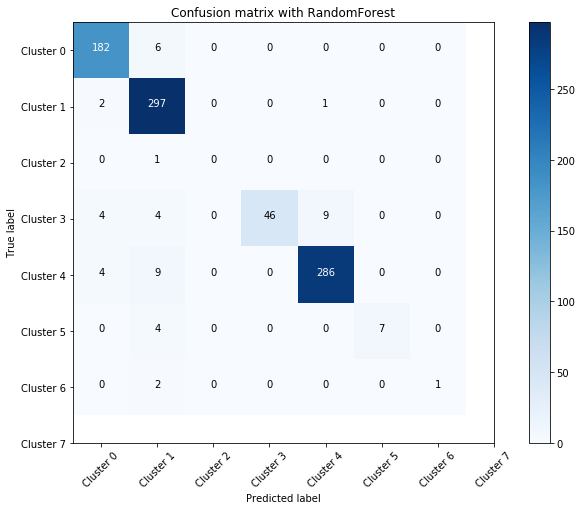

In [106]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_random, y_pred_random)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix with RandomForest')

## XGBoost

In [71]:
import xgboost

In [72]:
xgb_random = xgboost.XGBClassifier(random_state = 0, learning_rate = 0.01,
                                   objective = 'multi:softprob', n_estimators = 1000)
xgb_biased = xgboost.XGBClassifier(random_state = 0, learning_rate = 0.01, 
                                   objective = 'multi:softprob', n_estimators = 1000)

In [73]:
parameters = {'min_child_weight': [1, 5],
              'max_depth': [5, 7],
              'gamma': [0.5, 2],
              'subsample': [0.6, 0.8],
              'colsample_bytree': [0.6, 0.8],
             }

In [74]:
CV_xgb_random = model_selection.GridSearchCV(estimator=xgb_random, param_grid=parameters, cv= 5,
                                             verbose=10, n_jobs=-1, scoring='accuracy')
CV_xgb_random.fit(X_train_random, y_train_random)

CV_xgb_biased = model_selection.GridSearchCV(estimator=xgb_biased, param_grid=parameters, cv= 5,
                                             verbose=10, n_jobs=-1, scoring='accuracy')
CV_xgb_biased.fit(X_train_biased, y_train_biased)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: Deprec

[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9783549783549783, total= 2.2min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9827586206896551, total= 2.2min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9855282199710564, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9942196531791907, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9781976744186046, total= 2.1min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.4min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9841954022988506, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9783549783549783, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9956647398843931, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9813218390804598, total= 1.8min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9754689754689755, total= 1.8min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.5min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.984081041968162, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9796511627906976, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9942196531791907, total= 1.8min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9797395079594791, total= 1.8min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9738372093023255, total= 1.8min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9827586206896551, total= 1.9min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.974025974025974, total= 1.9min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 10.1min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9942196531791907, total= 2.0min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9811866859623734, total= 1.9min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9767441860465116, total= 2.0min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9827586206896551, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9783549783549783, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9956647398843931, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9855282199710564, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 13.2min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9781976744186046, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9841954022988506, total= 2.5min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9783549783549783, total= 2.5min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9971098265895953, total= 2.6min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9813218390804598, total= 1.9min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9855282199710564, total= 2.6min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9754689754689755, total= 1.9min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9811046511627907, total= 2.6min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9942196531791907, total= 1.9min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 19.2min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9826338639652678, total= 1.9min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9752906976744186, total= 1.9min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9827586206896551, total= 2.1min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.974025974025974, total= 2.1min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9942196531791907, total= 2.1min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9811866859623734, total= 2.1min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9781976744186046, total= 2.2min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.978448275862069, total= 2.0min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.974025974025974, total= 2.0min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 23.6min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9927745664739884, total= 2.1min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9826338639652678, total= 2.1min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9781976744186046, total= 2.1min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.978448275862069, total= 2.2min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.974025974025974, total= 2.2min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9927745664739884, total= 2.3min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9826338639652678, total= 2.3min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.978448275862069, total= 1.8min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9781976744186046, total= 2.3min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9754689754689755, total= 1.7min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9956647398843931, total= 1.8min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 29.5min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9826338639652678, total= 1.8min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9723837209302325, total= 1.8min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9798850574712644, total= 2.0min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9754689754689755, total= 2.0min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9942196531791907, total= 2.1min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.984081041968162, total= 2.1min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9781976744186046, total= 2.1min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9798850574712644, total= 2.4min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.974025974025974, total= 2.4min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9942196531791907, total= 2.4min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.984081041968162, total= 2.4min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 34.8min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9781976744186046, total= 2.4min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9770114942528736, total= 2.6min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.974025974025974, total= 2.6min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9927745664739884, total= 2.7min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.978448275862069, total= 1.9min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.984081041968162, total= 2.7min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9754689754689755, total= 1.9min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9767441860465116, total= 2.7min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9956647398843931, total= 2.0min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9826338639652678, total= 2.0min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9738372093023255, total= 2.0min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.978448275862069, total= 2.2min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.974025974025974, total= 2.2min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 43.2min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9942196531791907, total= 2.2min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.984081041968162, total= 2.2min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9767441860465116, total= 2.2min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9827586206896551, total= 2.4min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.976911976911977, total= 2.4min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9942196531791907, total= 2.5min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9855282199710564, total= 2.5min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9781976744186046, total= 2.5min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9827586206896551, total= 2.7min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9783549783549783, total= 2.7min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9956647398843931, total= 2.7min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9798850574712644, total= 2.1min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.984081041968162, total= 2.7min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 51.0min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9796511627906976, total= 2.7min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.974025974025974, total= 2.1min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9811866859623734, total= 2.1min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9927745664739884, total= 2.1min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9752906976744186, total= 2.1min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9798850574712644, total= 2.3min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.974025974025974, total= 2.3min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9942196531791907, total= 2.3min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9826338639652678, total= 2.3min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9781976744186046, total= 2.3min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9827586206896551, total= 2.7min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.976911976911977, total= 2.7min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9956647398843931, total= 2.7min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9855282199710564, total= 2.7min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9796511627906976, total= 2.7min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 60.9min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9827586206896551, total= 3.0min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9797979797979798, total= 3.0min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9971098265895953, total= 3.1min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9798850574712644, total= 2.2min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9869753979739508, total= 3.0min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.974025974025974, total= 2.2min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9781976744186046, total= 3.1min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9927745664739884, total= 2.2min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9826338639652678, total= 2.2min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9738372093023255, total= 2.2min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9798850574712644, total= 2.5min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.974025974025974, total= 2.5min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9942196531791907, total= 2.5min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.984081041968162, total= 2.5min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9796511627906976, total= 2.5min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 69.4min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9770114942528736, total= 2.5min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9754689754689755, total= 2.5min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9927745664739884, total= 2.6min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9826338639652678, total= 2.6min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9767441860465116, total= 2.5min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9798850574712644, total= 2.8min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9754689754689755, total= 2.8min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9927745664739884, total= 2.8min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9826338639652678, total= 2.8min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9770114942528736, total= 2.1min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9796511627906976, total= 2.8min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9754689754689755, total= 2.1min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9942196531791907, total= 2.2min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9826338639652678, total= 2.2min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9723837209302325, total= 2.2min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9755747126436781, total= 2.4min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9754689754689755, total= 2.4min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 81.0min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9942196531791907, total= 2.4min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.984081041968162, total= 2.4min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9767441860465116, total= 2.4min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9798850574712644, total= 2.9min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9725829725829725, total= 2.8min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9927745664739884, total= 2.9min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.984081041968162, total= 2.9min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9781976744186046, total= 2.9min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9813218390804598, total= 3.2min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9754689754689755, total= 3.2min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9927745664739884, total= 3.2min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9755747126436781, total= 2.3min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.984081041968162, total= 3.2min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9754689754689755, total= 2.3min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9781976744186046, total= 3.2min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9942196531791907, total= 2.4min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.984081041968162, total= 2.4min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9752906976744186, total= 2.4min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9770114942528736, total= 2.7min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.976911976911977, total= 2.6min


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9942196531791907, total= 2.6min


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.984081041968162, total= 2.5min


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9781976744186046, total= 2.3min


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 95.5min finished


Fitting 5 folds for each of 32 candidates, totalling 160 fits


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: Deprec

[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9742895805142084, total= 2.0min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9878213802435724, total= 2.0min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9782016348773842, total= 2.1min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9877717391304348, total= 2.1min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9918256130790191, total= 2.1min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.2min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.986468200270636, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.972936400541272, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9891304347826086, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9851150202976996, total= 1.8min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9756427604871448, total= 1.8min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.3min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9782016348773842, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9918256130790191, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9836956521739131, total= 1.8min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9741144414168937, total= 1.8min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9918256130790191, total= 1.8min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9851150202976996, total= 2.0min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9769959404600812, total= 2.0min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 10.1min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9836956521739131, total= 2.0min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9782016348773842, total= 2.0min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9918256130790191, total= 2.0min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9891745602165088, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9756427604871448, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9891304347826086, total= 2.4min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9795640326975477, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 13.1min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9918256130790191, total= 2.3min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.986468200270636, total= 2.6min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.972936400541272, total= 2.6min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9877717391304348, total= 2.6min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9851150202976996, total= 1.9min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9795640326975477, total= 2.6min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9756427604871448, total= 1.9min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9918256130790191, total= 2.6min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9850543478260869, total= 2.0min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 19.3min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9741144414168937, total= 1.9min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9918256130790191, total= 2.0min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9851150202976996, total= 2.2min
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9783491204330176, total= 2.2min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9864130434782609, total= 2.2min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9768392370572208, total= 2.2min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9918256130790191, total= 2.2min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9851150202976996, total= 2.1min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9756427604871448, total= 2.1min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 23.8min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9864130434782609, total= 2.2min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9754768392370572, total= 2.2min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9918256130790191, total= 2.1min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9824086603518268, total= 2.3min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9756427604871448, total= 2.3min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9877717391304348, total= 2.3min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9782016348773842, total= 2.3min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.986468200270636, total= 1.8min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9918256130790191, total= 2.3min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9756427604871448, total= 1.8min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9850543478260869, total= 1.8min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 30.0min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9741144414168937, total= 1.8min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9904632152588556, total= 1.8min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9837618403247632, total= 2.0min
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9769959404600812, total= 2.0min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9850543478260869, total= 2.0min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9768392370572208, total= 2.0min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9918256130790191, total= 2.0min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9851150202976996, total= 2.5min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9756427604871448, total= 2.4min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9850543478260869, total= 2.5min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9754768392370572, total= 2.4min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 35.0min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9918256130790191, total= 2.4min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9837618403247632, total= 2.7min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9756427604871448, total= 2.7min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9877717391304348, total= 2.7min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.986468200270636, total= 2.0min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9795640326975477, total= 2.7min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9756427604871448, total= 2.0min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9918256130790191, total= 2.7min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9850543478260869, total= 2.0min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9741144414168937, total= 2.0min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9904632152588556, total= 2.0min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9851150202976996, total= 2.2min
[CV] colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9769959404600812, total= 2.2min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 43.9min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9850543478260869, total= 2.3min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9782016348773842, total= 2.2min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.6, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9918256130790191, total= 2.2min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.986468200270636, total= 2.5min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9756427604871448, total= 2.5min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9877717391304348, total= 2.6min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9782016348773842, total= 2.5min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9918256130790191, total= 2.5min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9851150202976996, total= 2.8min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.972936400541272, total= 2.8min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9891304347826086, total= 2.8min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9851150202976996, total= 2.1min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9782016348773842, total= 2.8min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 51.8min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9769959404600812, total= 2.1min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9918256130790191, total= 2.8min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9836956521739131, total= 2.2min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9741144414168937, total= 2.2min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.989100817438692, total= 2.2min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9837618403247632, total= 2.4min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9769959404600812, total= 2.4min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9864130434782609, total= 2.4min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9768392370572208, total= 2.4min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.989100817438692, total= 2.4min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.986468200270636, total= 2.8min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9769959404600812, total= 2.8min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9904891304347826, total= 2.9min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9782016348773842, total= 2.8min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9918256130790191, total= 2.8min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 61.9min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9837618403247632, total= 3.1min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9742895805142084, total= 3.1min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9891304347826086, total= 3.2min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9851150202976996, total= 2.3min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9795640326975477, total= 3.1min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9769959404600812, total= 2.3min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9918256130790191, total= 3.1min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9836956521739131, total= 2.3min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9754768392370572, total= 2.3min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9877384196185286, total= 2.3min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9837618403247632, total= 2.5min
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9769959404600812, total= 2.5min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9864130434782609, total= 2.6min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9782016348773842, total= 2.5min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=7, min_child_weight=5, subsample=0.8, score=0.989100817438692, total= 2.6min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 70.7min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.986468200270636, total= 2.6min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9769959404600812, total= 2.6min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9877717391304348, total= 2.6min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9768392370572208, total= 2.6min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6, score=0.9904632152588556, total= 2.6min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9851150202976996, total= 2.8min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9756427604871448, total= 2.8min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9877717391304348, total= 2.9min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.986468200270636, total= 2.2min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9782016348773842, total= 2.9min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.9904632152588556, total= 2.9min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9756427604871448, total= 2.2min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9727520435967303, total= 2.2min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.9850543478260869, total= 2.2min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.989100817438692, total= 2.2min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9851150202976996, total= 2.4min
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9769959404600812, total= 2.4min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 82.6min
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9850543478260869, total= 2.5min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9754768392370572, total= 2.4min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.9904632152588556, total= 2.4min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.986468200270636, total= 2.9min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9769959404600812, total= 2.9min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9877717391304348, total= 3.0min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9782016348773842, total= 3.0min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.6, score=0.9904632152588556, total= 2.9min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9851150202976996, total= 3.2min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9756427604871448, total= 3.2min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9864130434782609, total= 3.3min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9878213802435724, total= 2.3min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9782016348773842, total= 3.3min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9769959404600812, total= 2.3min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8, score=0.9904632152588556, total= 3.3min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9850543478260869, total= 2.4min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.9741144414168937, total= 2.4min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.6, score=0.989100817438692, total= 2.4min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9837618403247632, total= 2.6min
[CV] colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8 


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9769959404600812, total= 2.6min


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9850543478260869, total= 2.6min


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9768392370572208, total= 2.5min


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  colsample_bytree=0.8, gamma=2, max_depth=7, min_child_weight=5, subsample=0.8, score=0.9904632152588556, total= 2.4min


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 97.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_child_weight': [1, 5], 'max_depth': [5, 7], 'gamma': [0.5, 2], 'subsample': [0.6, 0.8], 'colsample_bytree': [0.6, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [77]:
CV_xgb_random.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.5,
 'max_depth': 7,
 'min_child_weight': 1,
 'subsample': 0.8}

In [78]:
CV_xgb_biased.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.5,
 'max_depth': 7,
 'min_child_weight': 1,
 'subsample': 0.6}

In [76]:
print("Accuracy for XGBoost with random sampling on CV data: ", (CV_xgb_random.score(X_test_random, y_test_random))*100)
print("Accuracy for XGBoost with biased sampling on CV data: ", (CV_xgb_biased.score(X_test_biased, y_test_biased))*100)

/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy for XGBoost with random sampling on CV data:  98.84393063583815
Accuracy for XGBoost with biased sampling on CV data:  72.16174183514774


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
y_pred_random = CV_xgb_random.predict(X_test_random)

/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


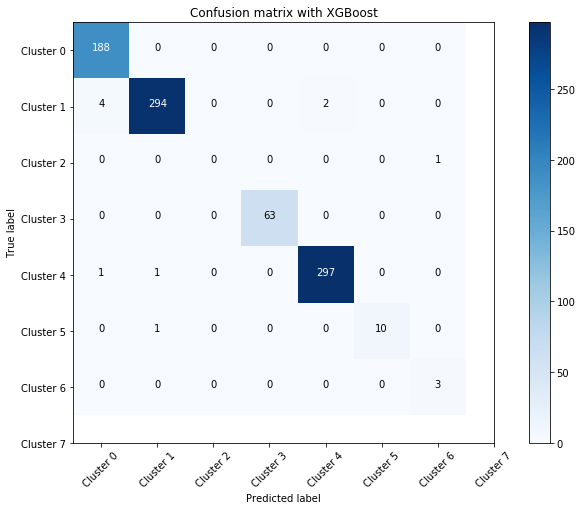

In [104]:
class_names = ["Cluster {}".format(x) for x in range(8)]

    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_random, y_pred_random)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix with XGBoost')

In [99]:
confusion_matrix(y_test_random, y_pred_random)

array([[188,   0,   0,   0,   0,   0,   0],
       [  4, 294,   0,   0,   2,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,  63,   0,   0,   0],
       [  1,   1,   0,   0, 297,   0,   0],
       [  0,   1,   0,   0,   0,  10,   0],
       [  0,   0,   0,   0,   0,   0,   3]])

We don't have all of the clusters represented in the test sample so I'll try to add it manually.

## Resampling

In [108]:
print(cluster0.shape[0], cluster1.shape[0], cluster2.shape[0], cluster3.shape[0], 
      cluster4.shape[0], cluster5.shape[0], cluster6.shape[0], cluster7.shape[0])

944 1544 3 296 4 1453 62 19


In [109]:
frames = [cluster0.sample(frac=0.8, random_state=0), cluster1.sample(frac=0.8, random_state=0),
          cluster2.sample(n=2, random_state=0),cluster3.sample(frac=0.8, random_state=0),
          cluster4.sample(n=2, random_state=0), cluster5.sample(frac=0.8, random_state=0),
          cluster6.sample(frac=0.8, random_state=0), cluster7.sample(frac=0.8, random_state=0)]


data_train_biased = pd.concat(frames)
data_test_biased = data.drop(data_train_biased.index, axis = 0)

In [110]:
X_train_biased = data_train_biased.drop(columns=['CustomerID', 'cluster'])
X_test_biased = data_test_biased.drop(columns=['CustomerID', 'cluster'])
y_train_biased = data_train_biased['cluster'].values
y_test_biased = data_test_biased['cluster'].values

In [111]:
scaler = StandardScaler() # create scaler object

X_train_biased = scaler.fit_transform(X_train_biased)
X_test_biased = scaler.fit_transform(X_test_biased)

In [135]:
with open('scaler.pickle', 'wb') as g:
    pickle.dump(scaler, g)

## Random Forest

In [112]:
rfc_biased=RandomForestClassifier(random_state=0, n_estimators = 1000)

In [113]:
param_grid = { 
    'n_estimators' : [100, 500, 1000],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 6],
    'criterion' :['gini', 'entropy']
}

In [114]:
CV_rfc_biased = model_selection.GridSearchCV(estimator=rfc_biased, param_grid=param_grid, cv= 5, verbose=10, n_jobs=-1, scoring='accuracy')
CV_rfc_biased.fit(X_train_biased, y_train_biased)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.8681159420289855, total=   0.8s
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.8804034582132565, total=   0.9s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.8768115942028986, total=   0.9s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.877521613832853, total=   1.0s
[CV] criterion=gini, max_depth=4, max_features=auto, n_e

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.9s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.8659942363112392, total=   4.1s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.8695652173913043, total=   4.0s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.8760806916426513, total=   4.3s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.863768115942029, total=   4.3s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.8420289855072464, total=   3.5s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=1000 


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.5s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=1000, score=0.8804034582132565, total=   7.0s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=1000, score=0.8659942363112392, total=   7.0s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=1000, score=0.8666666666666667, total=   7.1s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100, score=0.877521613832853, total=   0.8s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100, score=0.8804034582132565, total=   0.8s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100, score=0.87

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   16.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=1000, score=0.8594202898550725, total=   7.4s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500, score=0.8760806916426513, total=   3.6s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500, score=0.8659942363112392, total=   3.5s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=1000, score=0.8333333333333334, total=   7.3s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500, score=0.8695652173913043, total=   3.5s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500, score=0.8

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   24.8s


[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000, score=0.8804034582132565, total=  11.8s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000, score=0.8659942363112392, total=  11.8s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.8040345821325648, total=   0.8s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.80835734870317, total=   0.6s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.808695652173913, total=   0.6s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000, score=0.8666

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.7s


[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.7913043478260869, total=   0.9s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=500, score=0.8155619596541787, total=   3.5s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=500, score=0.8184438040345822, total=   3.7s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=500, score=0.8159420289855073, total=   3.4s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000, score=0.8333333333333334, total=   9.1s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=1000 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=500, score=0.81

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.7s


[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=1000, score=0.8144927536231884, total=   7.0s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=100, score=0.9236311239193083, total=   1.3s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=1000, score=0.8173913043478261, total=   6.9s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=100, score=0.9135446685878963, total=   1.2s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=100, score=0.927536231884058, total=   1.2s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=100, score=0.9086

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.1min


[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.9188405797101449, total=   7.9s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.9159420289855073, total=   7.4s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=1000, score=0.9322766570605188, total=  13.6s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=1000, score=0.9394812680115274, total=  13.1s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, score=0.9236311239193083, total=   1.1s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=1000, score=0

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.4min


[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9279538904899135, total=   6.3s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9293948126801153, total=   6.2s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9173913043478261, total=   6.2s
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=1000, score=0.9130434782608695, total=  13.2s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=1000 
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9188405797101449, total=   5.9s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.8min


[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=100, score=0.8289855072463768, total=   0.8s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=1000, score=0.9188405797101449, total=  12.5s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=500, score=0.8602305475504323, total=   3.8s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=500, score=0.8674351585014409, total=   3.9s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=500, score=0.863768115942029, total=   3.8s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=1000 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=1000, score=0.913

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.2min


[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=100, score=0.8976945244956772, total=   1.5s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=100, score=0.9014492753623189, total=   1.4s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=100, score=0.8869565217391304, total=   1.4s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=100, score=0.8695652173913043, total=   1.4s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=1000, score=0.8318840579710145, total=   9.6s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=auto, 

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.6min


[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100, score=0.8869565217391304, total=   1.3s
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100, score=0.9014492753623189, total=   1.4s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100 
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100, score=0.8695652173913043, total=   1.8s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=1000, score=0.8869565217391304, total=  13.2s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500, score=0.9034582132564841, total=   8.5s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=aut

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.1min


[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=100, score=0.8173913043478261, total=   0.9s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=100, score=0.7942028985507247, total=   0.8s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=1000, score=0.8855072463768116, total=  12.9s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=1000, score=0.8869565217391304, total=  12.6s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=500, score=0.8285302593659942, total=   4.2s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=lo

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.4min


[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=100, score=0.9202898550724637, total=   1.6s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=100, score=0.9188405797101449, total=   1.6s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=1000, score=0.8057971014492754, total=   8.6s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=500, score=0.9481268011527377, total=   7.7s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=500, score=0.9481268011527377, total=   7.7s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=au

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.0min


[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9481268011527377, total=   7.6s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9481268011527377, total=   7.7s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9536231884057971, total=   7.6s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=1000, score=0.9318840579710145, total=  16.0s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.9347826086956522, total=   7.8s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  4.7min


[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=500, score=0.8710144927536232, total=   5.3s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=500, score=0.8478260869565217, total=   5.3s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000, score=0.8674351585014409, total=  10.4s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000, score=0.8876080691642652, total=  10.7s
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000, score=0.8797101449275362, total=  10.6s
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000, score=0.8724637681159421, total=  10.8s
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=1000, score

[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  4.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 6], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [115]:
CV_rfc_biased.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 1000}

In [116]:
print("Accuracy for Random Forest with biased sampling on CV data: ", (CV_rfc_biased.score(X_test_biased, y_test_biased))*100)

Accuracy for Random Forest with biased sampling on CV data:  93.07958477508652


In [124]:
y_pred_biased = CV_rfc_biased.predict(X_test_biased)

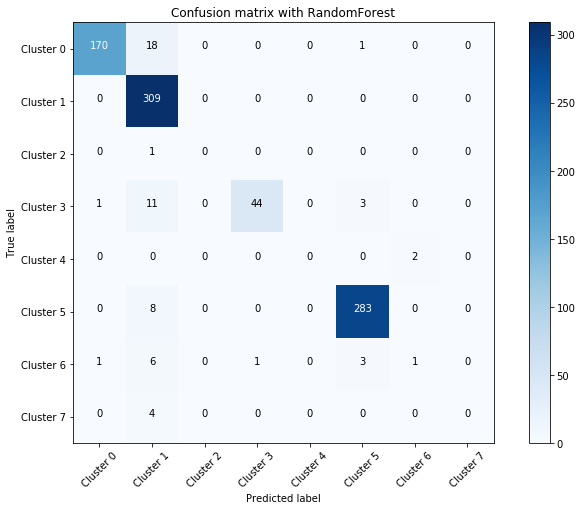

In [125]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_biased, y_pred_biased)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix with RandomForest')

## XGBoost

In [126]:
xgb_biased = xgboost.XGBClassifier(random_state = 0, learning_rate = 0.01, 
                                   objective = 'multi:softprob', n_estimators = 1000,
                                  colsample_bytree = 0.6, gamma = 0.5, max_depth = 7,
                                  min_child_weight = 1, subsample=0.8, n_jobs=-1, scoring='accuracy')

In [127]:
xgb_biased.fit(X_train_biased, y_train_biased)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.5, learning_rate=0.01,
       max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, scoring='accuracy', seed=None,
       silent=True, subsample=0.8)

In [128]:
print("Accuracy for XGBoost with biased sampling on CV data: ", (xgb_biased.score(X_test_biased, y_test_biased))*100)

Accuracy for XGBoost with biased sampling on CV data:  97.80853517877739


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [129]:
y_pred_biased = xgb_biased.predict(X_test_biased)

/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


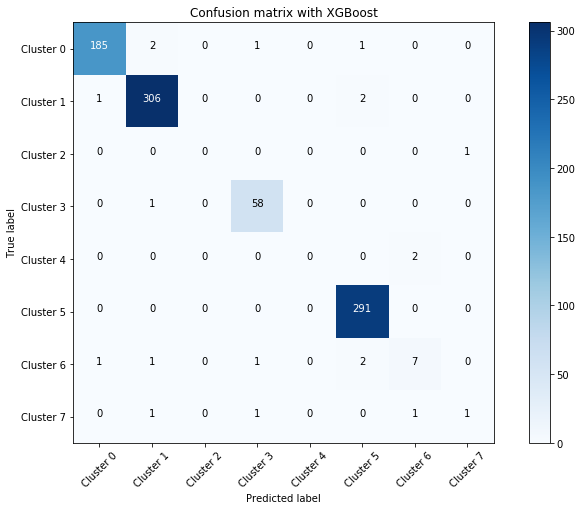

In [130]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_biased, y_pred_biased)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix with XGBoost')

Confusion matrix, without normalization
[[185   2   0   1   0   1   0   0]
 [  1 306   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   1]
 [  0   1   0  58   0   0   0   0]
 [  0   0   0   0   0   0   2   0]
 [  0   0   0   0   0 291   0   0]
 [  1   1   0   1   0   2   7   0]
 [  0   1   0   1   0   0   1   1]]
Confusion matrix, without normalization
[[185   2   0   1   0   1   0   0]
 [  1 306   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   1]
 [  0   1   0  58   0   0   0   0]
 [  0   0   0   0   0   0   2   0]
 [  0   0   0   0   0 291   0   0]
 [  1   1   0   1   0   2   7   0]
 [  0   1   0   1   0   0   1   1]]
Normalized confusion matrix
[[0.98 0.01 0.   0.01 0.   0.01 0.   0.  ]
 [0.   0.99 0.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.02 0.   0.98 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.08 0.08 0.   0.08 0.   0.17 0.58 0.  ]
 [0.   0.25 0.   0.25 0.   0.

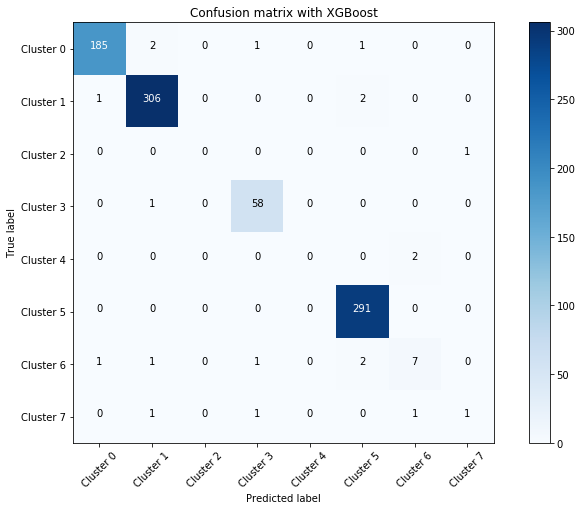

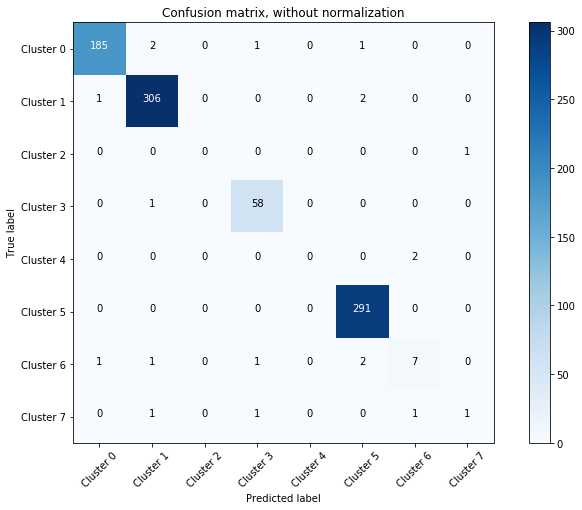

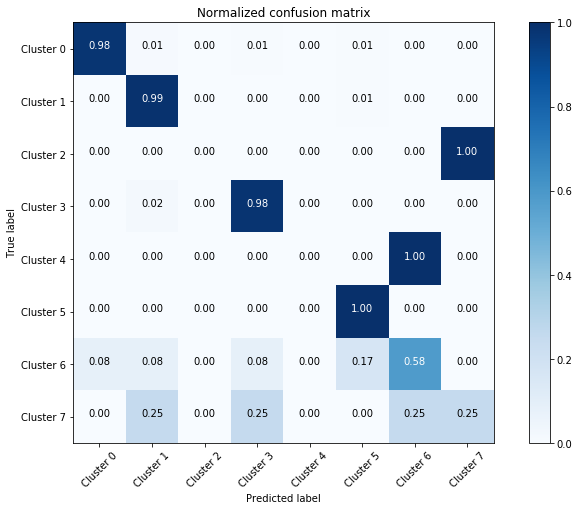

In [302]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_biased, y_pred_biased)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix with XGBoost')

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

# Saving the best estimator

In [134]:
with open('training_algos.pickle', 'wb') as f:
    pickle.dump([CV_xgb_random, CV_rfc_random, xgb_biased], f)